nonlinear systems

One simple transition rule that can generate complex dynamics is the logistic map

$$x_{t+1} = r x_t(1 - x_t) ,
\quad x_0 \in [0, 1],
\quad r \in [0, 4]$$

Let’s write a class for generating time series from this model

In [1]:
class Chaos:
    """
    Models the dynamical system with :math:`x_{t+1} = r x_t (1 - x_t)`
    """
    def __init__(self, x0, r):
        """
        Initialize with state x0 and parameter r 
        """
        self.x, self.r = x0, r
        
    def update(self):
        "Apply the map to update state."
        self.x =  self.r * self.x *(1 - self.x)
        
    def generate_sequence(self, n):
        "Generate and return a sequence of length n."
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path

In [2]:
ch = Chaos(0.1, 4.0)     # x0 = 0.1 and r = 0.4
ch.generate_sequence(5)  # First 5 iterates

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

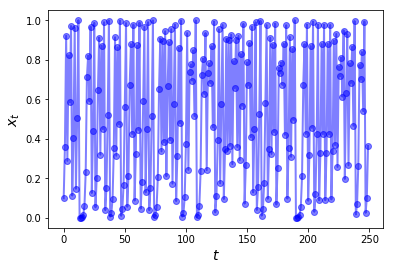

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

ch = Chaos(0.1, 4.0) 
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel(r'$t$', fontsize=14)
ax.set_ylabel(r'$x_t$', fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha=0.5, lw=2, label=r'$x_t$')
plt.show()

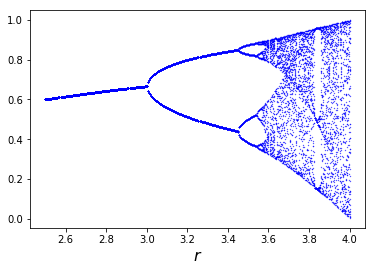

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r] * len(t), t, 'b.', ms=0.6)
    r = r + 0.005

ax.set_xlabel(r'$r$', fontsize=16)
plt.show()

On the horizontal axis is the parameter rr 

The vertical axis is the state space [0,1]

For each rr we compute a long time series and then plot the tail (the last 50 points)

The tail of the sequence shows us where the trajectory concentrates after settling down to some kind of steady state, if a steady state exists

Whether it settles down, and the character of the steady state to which it does settle down, depend on the value of rr

For rr between about 2.5 and 3, the time series settles into a single fixed point plotted on the vertical axis

For rr between about 3 and 3.45, the time series settles down to oscillating between the two values plotted on the vertical axis

For rr a little bit higher than 3.45, the time series settles down to oscillating among the four values plotted on the vertical axis

Notice that there is no value of rr that leads to a steady state oscillating among three values